**Importing essential libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [25]:
df = pd.read_csv('Spotify2024.csv', encoding='latin1')
dft = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,05-04-2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,01-12-2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,1


**Removing duplicates and checking the shape**

In [4]:
df = df.drop_duplicates().reset_index(drop = True)

In [5]:
df.shape

(4598, 29)

**EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   float64
 8   Spotify Playlist Count      4528 non-null   float64
 9   Spotify Playlist Reach      4526 non-null   float64
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   float64
 12  YouTube Likes               4283 non-null   float64
 13  TikTok Posts                3425 

**Insights from above**
1. Release data should be in date format
2. All time rank in int
3. While other columns from 7-28 shld be float
4. Datatype can be formatted after removing unncecessary columns

**Checking the % of null**

In [7]:
(df.isna().sum()/len(df))*100

Track                           0.000000
Album Name                      0.000000
Artist                          0.108743
Release Date                    0.000000
ISRC                            0.000000
All Time Rank                   0.000000
Track Score                     0.000000
Spotify Streams                 2.457590
Spotify Playlist Count          1.522401
Spotify Playlist Reach          1.565898
Spotify Popularity             17.485863
YouTube Views                   6.698565
YouTube Likes                   6.850805
TikTok Posts                   25.511092
TikTok Likes                   21.313615
TikTok Views                   21.335363
YouTube Playlist Reach         21.944324
Apple Music Playlist Count     12.200957
AirPlay Spins                  10.830796
SiriusXM Spins                 46.172249
Deezer Playlist Count          20.030448
Deezer Playlist Reach          20.182688
Amazon Playlist Count          22.944759
Pandora Streams                24.053936
Pandora Track St

There are few columns with null percentage greater than 15 which all can be dropped except few such as
* Spotify popularity which can be calculated from rank
* TikTok posts and likes - KNN imputer since these values will be higher if it performs well on other platforms

In [8]:
df = df.drop(['TikTok Posts', 'YouTube Playlist Reach', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',\
             'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Pandora Track Stations', \
              'Soundcloud Streams', 'TIDAL Popularity'], axis = 1)

After dropping the columns, dtypes are changed to desirable format

In [9]:
colstoconvert = ['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 'YouTube Views', 'YouTube Likes', \
                 'TikTok Likes', 'TikTok Views', 'Apple Music Playlist Count', 'AirPlay Spins', 'Shazam Counts']
for col in colstoconvert:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   int64  
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   float64
 8   Spotify Playlist Count      4528 non-null   float64
 9   Spotify Playlist Reach      4526 non-null   float64
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   float64
 12  YouTube Likes               4283 non-null   float64
 13  TikTok Likes                3618 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
All Time Rank,4598.0,2.290399e+03,1.323056e+03,1.0,1144.25,2289.5,3.435750e+03,4.998000e+03
Track Score,4598.0,4.185089e+01,3.855071e+01,19.4,23.30,29.9,4.447500e+01,7.254000e+02
Spotify Streams,4485.0,4.474069e+08,5.385504e+08,1071.0,70354552.00,239850720.0,6.291025e+08,4.281469e+09
Spotify Playlist Count,4528.0,5.939751e+04,7.114560e+04,1.0,6705.00,32312.5,8.608325e+04,5.903920e+05
Spotify Playlist Reach,4526.0,2.335177e+07,2.969279e+07,1.0,4789848.50,13264111.5,2.966802e+07,2.623434e+08
Spotify Popularity,3794.0,6.349868e+01,1.618995e+01,1.0,61.00,67.0,7.300000e+01,9.600000e+01
YouTube Views,4290.0,4.027841e+08,7.020105e+08,913.0,40756124.25,148269610.0,4.646921e+08,1.632276e+10
YouTube Likes,4283.0,2.930659e+06,4.594517e+06,25.0,409749.50,1257935.0,3.575526e+06,6.231118e+07
TikTok Likes,3618.0,1.126902e+08,5.499597e+08,3.0,5810119.50,26576921.5,9.333136e+07,2.347422e+10
TikTok Views,3617.0,1.161724e+09,5.883161e+09,19.0,58980168.00,266064027.0,9.145973e+08,2.332323e+11


* Mean is greater than median in all the columns
* Using spotify popularity distribution we can divide the data into three above 75% as Hottest tracks, 25%-50% as
well-known tracks and below 25% as least popular tracks

In [12]:
(df.isna().sum()/len(df))*100

Track                          0.000000
Album Name                     0.000000
Artist                         0.108743
Release Date                   0.000000
ISRC                           0.000000
All Time Rank                  0.000000
Track Score                    0.000000
Spotify Streams                2.457590
Spotify Playlist Count         1.522401
Spotify Playlist Reach         1.565898
Spotify Popularity            17.485863
YouTube Views                  6.698565
YouTube Likes                  6.850805
TikTok Likes                  21.313615
TikTok Views                  21.335363
Apple Music Playlist Count    12.200957
AirPlay Spins                 10.830796
Shazam Counts                 12.548934
Explicit Track                 0.000000
dtype: float64

**Treating nulls using mean/mode/KNN imputer/Logistic reg**

In [13]:
#Columns with less than or closer to 5% are imputed by mean/mode for simplification
mean_cols = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes']

for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace = True)

df['Artist'].fillna(df['Artist'].mode()[0], inplace = True)

In [14]:
#Since popularity depends on rank, we can calculate mean for each category and fill it in popularity
r1 = round(df['Spotify Popularity'][df['All Time Rank']<500].mean(),0)
r2 = round(df['Spotify Popularity'][(df['All Time Rank']>500) & (df['All Time Rank']<1000)].mean(),0)
r3 = round(df['Spotify Popularity'][(df['All Time Rank']>1000) & (df['All Time Rank']<1500)].mean(),0)
r4 = round(df['Spotify Popularity'][(df['All Time Rank']>1500) & (df['All Time Rank']<2000)].mean(),0)
r5 = round(df['Spotify Popularity'][(df['All Time Rank']>2000) & (df['All Time Rank']<2500)].mean(),0)
r6 = round(df['Spotify Popularity'][df['All Time Rank']>3000].mean(),0)

def fill_na(row):
    if pd.isna(row['Spotify Popularity']):
        rank = row['All Time Rank']
        if rank<500:
            return r1
        elif rank<1000:
            return r2
        elif rank<1500:
            return r3
        elif rank<2000:
            return r4
        elif rank<2500:
            return r5
        else:
            return r6
    else:
        return row['Spotify Popularity']

df['Spotify Popularity'] = df.apply(fill_na, axis =1)

**Data correlation**
To check which is highly correlated to other field to fill in na values

In [15]:
df.select_dtypes(include = 'number').corr()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Likes,TikTok Views,Apple Music Playlist Count,AirPlay Spins,Shazam Counts,Explicit Track
All Time Rank,1.000000,-0.633555,-0.291879,-0.247683,-0.377987,-0.232330,-0.223815,-0.256021,-0.105151,-0.109471,-0.363205,-0.301413,-0.171310,-0.028295
Track Score,-0.633555,1.000000,0.248054,0.188610,0.496059,0.206968,0.198814,0.215452,0.103156,0.113231,0.402732,0.378286,0.129975,0.041674
Spotify Streams,-0.291879,0.248054,1.000000,0.797522,0.577151,0.331367,0.434234,0.525624,0.043443,0.030006,0.744462,0.440654,0.484178,-0.002879
Spotify Playlist Count,-0.247683,0.188610,0.797522,1.000000,0.611113,0.373080,0.313053,0.413501,0.049538,0.035000,0.685654,0.383039,0.455490,0.123638
Spotify Playlist Reach,-0.377987,0.496059,0.577151,0.611113,1.000000,0.461322,0.188504,0.244900,0.030857,0.021950,0.666903,0.416964,0.318946,0.009375
Spotify Popularity,-0.232330,0.206968,0.331367,0.373080,0.461322,1.000000,0.038663,0.104949,-0.044521,-0.056633,0.296686,0.156033,0.164866,0.068485
YouTube Views,-0.223815,0.198814,0.434234,0.313053,0.188504,0.038663,1.000000,0.832291,-0.000039,0.003370,0.354982,0.115613,0.273224,-0.147520
YouTube Likes,-0.256021,0.215452,0.525624,0.413501,0.244900,0.104949,0.832291,1.000000,0.046385,0.040832,0.404702,0.178164,0.302865,-0.111416
TikTok Likes,-0.105151,0.103156,0.043443,0.049538,0.030857,-0.044521,-0.000039,0.046385,1.000000,0.992530,0.048447,0.062696,0.044812,-0.013382
TikTok Views,-0.109471,0.113231,0.030006,0.035000,0.021950,-0.056633,0.003370,0.040832,0.992530,1.000000,0.039765,0.063719,0.043552,-0.018690


* TikTok Likes and views are highly correlated but both have 20% null values so KNN imputers shld be used
* While Apple Music Playlist Count is highly correlated with Spotify Streams and shazam counts - linear reg shld be used
* Airplay spins are moderately corr with other fields so KNN used

**Linear regression model**

In [16]:
from sklearn.linear_model import LinearRegression

# 1. Prepare training data
train_data = df.dropna(subset=['Apple Music Playlist Count'])
X_train = train_data['Spotify Streams'].values.reshape(-1, 1)
y_train = train_data['Apple Music Playlist Count']

# 2. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict missing values
missing_mask = df['Apple Music Playlist Count'].isna()
X_missing = df.loc[missing_mask, 'Spotify Streams'].values.reshape(-1, 1)
predicted = model.predict(X_missing)

# 4. Impute
df1 = df.copy()
df1.loc[missing_mask, 'Apple Music Playlist Count'] = predicted


In [17]:
shazamdt = df1.dropna(subset = ['Shazam Counts','Apple Music Playlist Count'])
X_s = shazamdt['Apple Music Playlist Count'].values.reshape(-1,1)
y_s = shazamdt['Shazam Counts']

model.fit(X_s, y_s)

missingdt = df1['Shazam Counts'].isna()
X_test = df1.loc[missingdt, 'Apple Music Playlist Count'].values.reshape(-1,1)
y_pred = model.predict(X_test)

df1.loc[missingdt, 'Shazam Counts'] = y_pred

**KNN imputer**

In [18]:
from sklearn.impute import KNNImputer

num_df = df1.select_dtypes(include = 'number')
imputer = KNNImputer(n_neighbors = 10)

imputed_dt = pd.DataFrame(imputer.fit_transform(num_df), columns = num_df.columns)
df1[num_df.columns] = imputed_dt

In [19]:
df1.isna().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Likes                  0
TikTok Views                  0
Apple Music Playlist Count    0
AirPlay Spins                 0
Shazam Counts                 0
Explicit Track                0
dtype: int64

**Changing float column to category for visualization**

In [20]:
#Spotify popularity is changed to category for visualisation purpose

q25 = df1['Spotify Popularity'].quantile(0.25)
q75 = df1['Spotify Popularity'].quantile(0.75)
def popcategory(row):
    popularity = row['Spotify Popularity']
    if popularity < q25:
        return 'Least popular'
    elif popularity < q75:
        return 'Well-known'
    else:
        return 'Hot track'
df1['Spotify_pop_category'] = df1.apply(popcategory, axis = 1)

In [21]:
df1['Spotify_pop_category'].value_counts()

Spotify_pop_category
Well-known       2390
Hot track        1361
Least popular     847
Name: count, dtype: int64

In [22]:
df1.drop('Spotify Popularity', inplace = True, axis = 1)

**Formatting obj columns by removing non alpha numeric values and shortening it using regex**

In [71]:
df1['Clean_track'] = (
    df1['Track']
    .str.replace(r'\(.*?\)', '', regex=True)  # balanced ()
    .str.replace(r'\[.*?\]', '', regex=True)  # balanced []
    .str.replace(r'\(.*', '', regex=True)     # unbalanced (
    .str.replace(r'\[.*', '', regex=True)     # unbalanced [
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
    .str.strip()
    .replace('', np.nan)
)

df1.loc[df1['Clean_track'].str.len() >100, 'Clean_track']

Series([], Name: Clean_track, dtype: object)

In [72]:
df1['Clean_album'] = (
    df1['Album Name']
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.replace(r'\[.*?\]', '', regex=True)  # balanced []
    .str.replace(r'\(.*', '', regex=True)     # unbalanced (
    .str.replace(r'\[.*', '', regex=True)     # unbalanced [
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
    .str.strip()
    .str.slice(0,99)
    .replace('', np.nan)
)

df1.loc[df1['Clean_album'].str.len() >100, 'Clean_album']

Series([], Name: Clean_album, dtype: object)

In [70]:
df1['Clean_artist'] = (
    df1['Artist']
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
    .str.strip()
    .str.slice(0,99)
    .replace('', np.nan)
)


In [74]:
#Dropping the raw columns
df1.drop(['Track', 'Album Name', 'Artist'], inplace = True, axis = 1)

KeyError: "['Track', 'Album Name', 'Artist'] not found in axis"

In [75]:
df1.isna().sum()

ISRC                           0
All Time Rank                  0
Track Score                    0
Spotify Streams                0
Spotify Playlist Count         0
Spotify Playlist Reach         0
YouTube Views                  0
YouTube Likes                  0
TikTok Likes                   0
TikTok Views                   0
Apple Music Playlist Count     0
AirPlay Spins                  0
Shazam Counts                  0
Explicit Track                 0
Spotify_pop_category           0
Release year                   0
Clean_track                   60
Clean_album                   45
Clean_artist                  13
dtype: int64

**Filling null values which are removed while cleaning the data**

In [76]:
clean_cols = ['Clean_track', 'Clean_album', 'Clean_artist']
for col in clean_cols:
    df1[col].fillna(df1[col].mode()[0], inplace = True)

**Date formatting and extracting the release year**

In [ ]:
def parse_mixed_date(date_str):
    from dateutil import parser
    try:
        return parser.parse(date_str, dayfirst=False)
    except:
        return pd.NaT

df1['Release Date'] = df1['Release Date'].astype(str).apply(parse_mixed_date)

In [ ]:
df1['Release year'] = df1['Release Date'].dt.year
df1.drop(['Release Date'], axis = 1, inplace = True)

In [78]:
df1.head()

,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,TikTok Likes,TikTok Views,Apple Music Playlist Count,AirPlay Spins,Shazam Counts,Explicit Track,Spotify_pop_category,Release year,Clean_track,Clean_album,Clean_artist
0,QM24S2402528,1.0,725.4,3.904709e+08,30716.0,196631588.0,8.427475e+07,1713126.0,6.515659e+08,5.332282e+09,210.0,40975.0,2669262.0,0.0,Hot track,2024,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman
1,USUG12400910,2.0,545.9,3.237039e+08,28113.0,174597137.0,1.163470e+08,3486739.0,3.522355e+07,2.083390e+08,188.0,40778.0,1118279.0,1.0,Hot track,2024,Not Like Us,Not Like Us,Kendrick Lamar
2,QZJ842400387,3.0,538.4,6.013093e+08,54331.0,211607669.0,1.225991e+08,2228730.0,2.751542e+08,3.369121e+09,190.0,74333.0,5285340.0,0.0,Hot track,2024,i like the way you kiss me,I like the way you kiss me,Artemas
3,USSM12209777,4.0,444.9,2.031281e+09,269802.0,136569078.0,1.096101e+09,10629796.0,1.078758e+09,1.460373e+10,394.0,1474799.0,11822942.0,0.0,Hot track,2023,Flowers,Flowers - Single,Miley Cyrus
4,USUG12403398,5.0,423.3,1.070349e+08,7223.0,151469874.0,7.737396e+07,3670188.0,2.368726e+07,2.234093e+08,182.0,12185.0,457017.0,1.0,Hot track,2024,Houdini,Houdini,Eminem


**Data visualization**

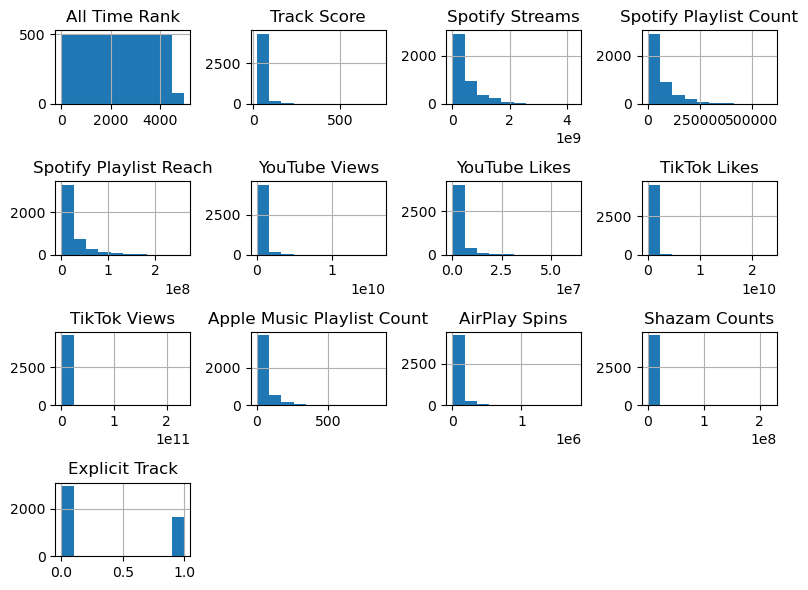

In [23]:
df1.hist(figsize = (8,6))
plt.tight_layout()

* Most data are right skewed which means mean is more than median
* Explicit track shows most tracks are inspired

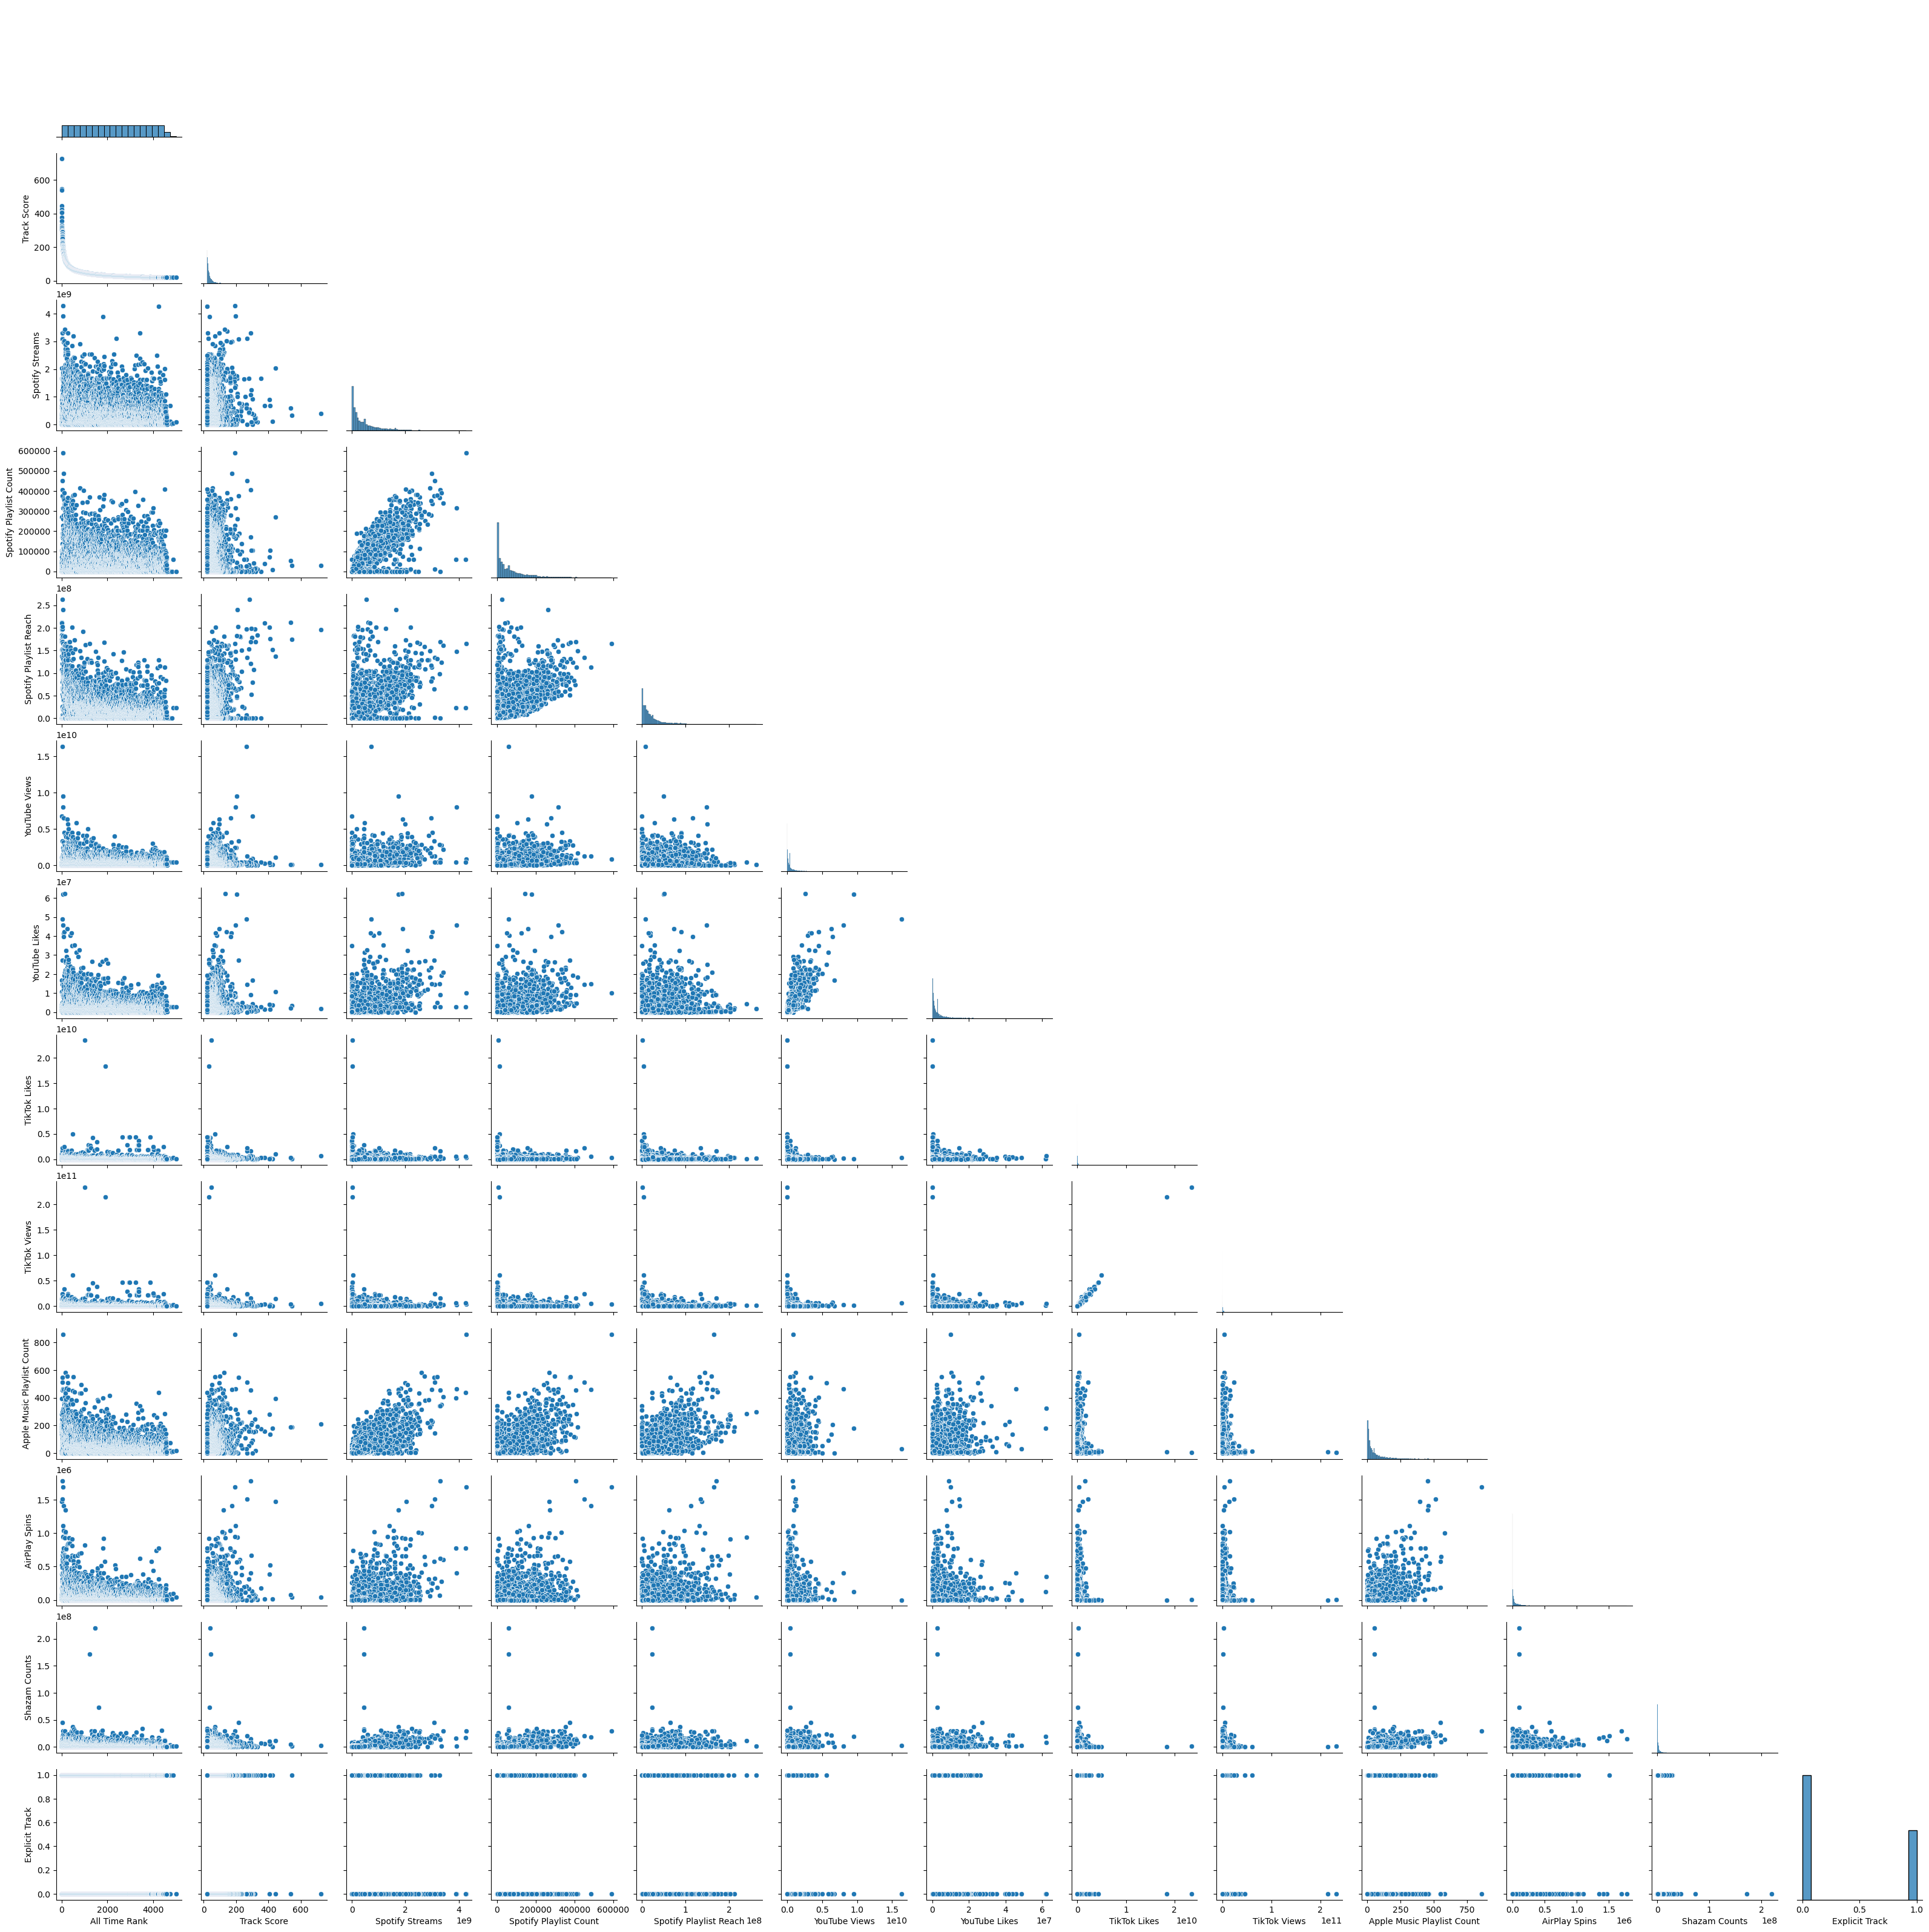

In [24]:
sns.pairplot(df1, corner = True)

There are some columns which depends on each other and some don't so to further visualise heatmap is used 

<Axes: >

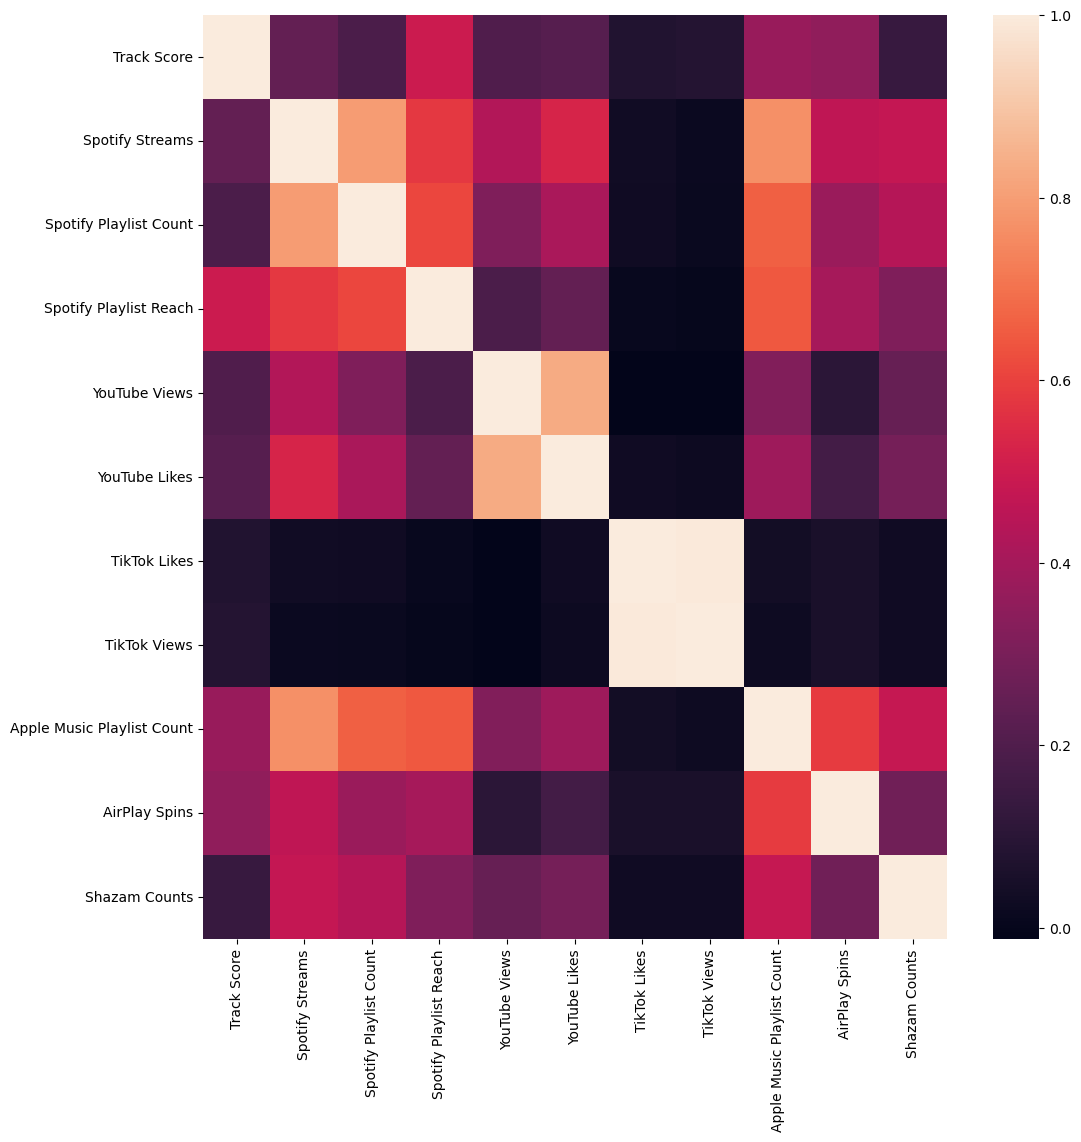

In [25]:
plt.figure(figsize = (12,12))
updt_num = df1.select_dtypes(include = 'number').columns.tolist()
updt_num1 = [col for col in updt_num if col not in ['All Time Rank', 'Explicit Track'] ]
sns.heatmap(df1[updt_num1].corr())

* Most columns are least correlated with each other such as Tiktok likes and youtube view, Spotify playlist reach and
track scores, Spotify streams and apply music playlist count
* Spotify plylist reach and count, and youtube likes and view are the most corr among others
* Least corr is Tiktok likes/view with any columns

In [26]:
df1.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views',
       'YouTube Likes', 'TikTok Likes', 'TikTok Views',
       'Apple Music Playlist Count', 'AirPlay Spins', 'Shazam Counts',
       'Explicit Track', 'Spotify_pop_category'],
      dtype='object')

<Axes: xlabel='Track Score', ylabel='All Time Rank'>

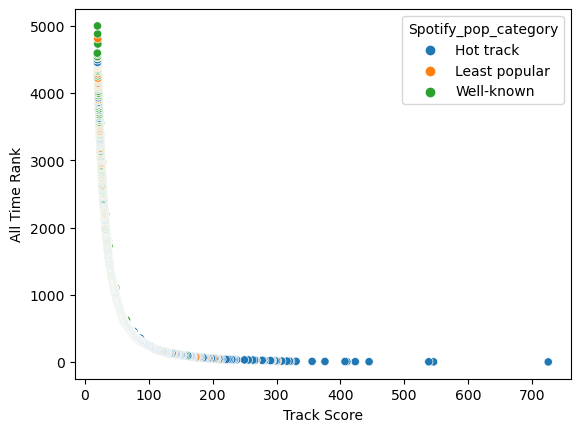

In [27]:
sns.scatterplot(x = 'Track Score', y= 'All Time Rank', hue = 'Spotify_pop_category', data = df1)

Songs with high track score and top ranks are highly popular in spotify

<Axes: xlabel='Spotify Streams', ylabel='Track Score'>

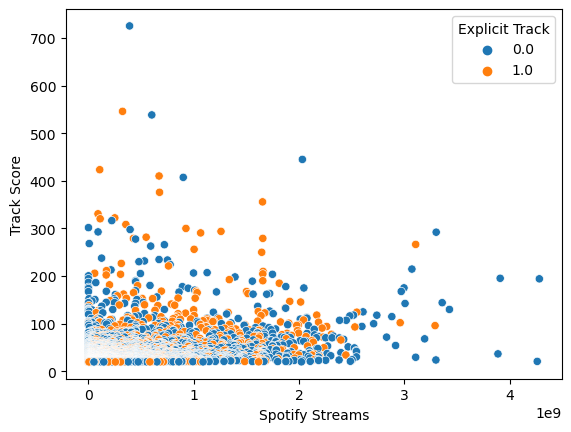

In [28]:
sns.scatterplot(x = 'Spotify Streams', y= 'Track Score', hue = 'Explicit Track', data = df1)

* This shows highest scoring track is not explicit while scores above 300 are contributed mainly by new/stand alone songs
* On the other side, adopted songs do well in spotify streams

<Axes: xlabel='Release year', ylabel='Explicit Track'>

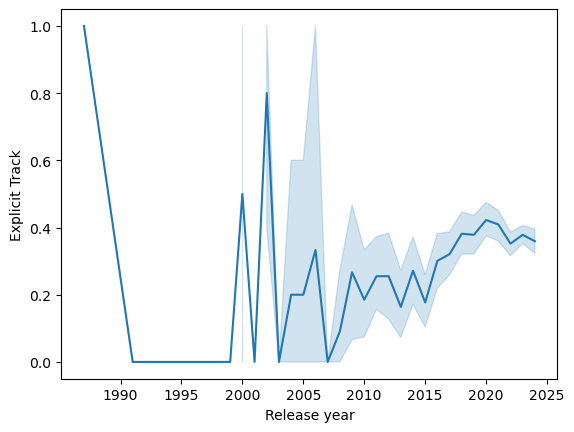

In [33]:
sns.lineplot(x = 'Release year', y = 'Explicit Track', data = df1)

**Exporting the csv file**

In [ ]:
df1.to_csv('EDA_Spotify2024.csv', index=False)

In [34]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

All the columns are in right data format and only three col have null values of one each

In [35]:
dft.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


* This second data is to be merged with df1 thro sql server and some views are created. Not going to treat null values as those columns are not used in visualisation
* Cleaning the data is must since we are gng to join them by these columns

In [26]:
dft['Clean_track'] = (
    dft['track_name']
    .str.replace(r'\(.*?\)', '', regex=True)  # balanced ()
    .str.replace(r'\[.*?\]', '', regex=True)  # balanced []
    .str.replace(r'\(.*', '', regex=True)     # unbalanced (
    .str.replace(r'\[.*', '', regex=True)     # unbalanced [
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
    .str.strip()
    .str.slice(0,99)
    .replace('', np.nan)
)

dft.loc[dft['Clean_track'].str.len() >100, 'Clean_track']

Series([], Name: Clean_track, dtype: object)

In [27]:
dft['Clean_album'] = (
    dft['album_name']
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.replace(r'\[.*?\]', '', regex=True)  # balanced []
    .str.replace(r'\(.*', '', regex=True)     # unbalanced (
    .str.replace(r'\[.*', '', regex=True)     # unbalanced [
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
    .str.strip()
    .str.slice(0,99)
    .replace('', np.nan)
)

dft.loc[dft['Clean_album'].str.len() >100, 'Clean_album']

Series([], Name: Clean_album, dtype: object)

In [28]:
dft['Clean_artist'] = (
    dft['artists']
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
    .str.strip()
    .str.slice(0,99)
    .replace('', np.nan)
)


In [29]:
#Dropping the raw columns
dft.drop(['track_name', 'album_name', 'artists'], inplace = True, axis = 1)

In [30]:
clean_cols = ['Clean_track', 'Clean_album', 'Clean_artist']
for col in clean_cols:
    dft[col].fillna(dft[col].mode()[0], inplace = True)

In [31]:
dft.isna().sum()

Unnamed: 0          0
track_id            0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
Clean_track         0
Clean_album         0
Clean_artist        0
dtype: int64

In [32]:
dft.head()

,Unnamed: 0,track_id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Clean_track,Clean_album,Clean_artist
0,0,5SuOikwiRyPMVoIQDJUgSV,73,230666,False,0.676,0.4610,1,-6.746,0,...,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Comedy,Comedy,Gen Hoshino
1,1,4qPNDBW1i3p13qLCt0Ki3A,55,149610,False,0.420,0.1660,1,-17.235,1,...,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Ghost - Acoustic,Ghost,Ben Woodward
2,2,1iJBSr7s7jYXzM8EGcbK5b,57,210826,False,0.438,0.3590,0,-9.734,1,...,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,To Begin Again,To Begin Again,Ingrid Michaelson;ZAYN
3,3,6lfxq3CG4xtTiEg7opyCyx,71,201933,False,0.266,0.0596,0,-18.515,1,...,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Can't Help Falling In Love,Crazy Rich Asians,Kina Grannis
4,4,5vjLSffimiIP26QG5WcN2K,82,198853,False,0.618,0.4430,2,-9.681,1,...,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Hold On,Hold On,Chord Overstreet


In [33]:
dft.to_csv('EDA_dataset.csv', index=False)